# Customer Retention

Project Aim:
1. Calculate and analyse the retention rates of different customers cohorts over time (Retention Rate Analysis).
2. Segment customers into distincts cohort(group) based on common beahviours, such as acquisition date    or first purchase date (Cohort Segmentation).
3. Identify retention trends
4. Churn Analysis(Reasons for customers leaving within various cohorts, and build a predictive model that can be used to predict churn behaviour)
5. Recommend Strategies

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Dataset_ecommerce.csv')
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


## Data Cleaning

In [3]:
is_Nan = df.isnull().any() # check if any column has null value

In [4]:
null_count = df.isnull().sum() # sum of null values in each column
null_count

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [5]:
## drop rows with Nan and reset index
df = df.dropna().reset_index(drop=True)
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
406825,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
406826,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
406827,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [7]:
df['CustomerID'] = df['CustomerID'].astype(int)
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal


In [8]:
# mask = df['InvoiceNo'].str.contains(r'[A-Za-z]', na=False)

# rows_with_chars = df[mask]                                    ##checking InvoiceNo that contains char

# print("Rows where 'invoice_id' contains alphabetic characters:")
# print(rows_with_chars)

## E.D.A

In [9]:
df['total_price'] = df['UnitPrice'] * df['Quantity']
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,total_price
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50
...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,913.25
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,8521.10
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,560.98
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,3592.35


In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create new columns for month and year, and day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Day'] = df['InvoiceDate'].dt.day
df


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,total_price,Month,Year,Day
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95,12,2010,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95,12,2010,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22,12,2010,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95,12,2010,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50,12,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,913.25,12,2011,9
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,8521.10,12,2011,9
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,560.98,12,2011,9
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,3592.35,12,2011,9


In [11]:
#grouping Data by the daily sales
daily_sales= df.groupby('Day')['total_price'].sum().reset_index()
daily_sales

,Day,total_price
0,1,35556784.74
1,2,31549914.60
2,3,28170112.14
3,4,38861462.69
4,5,42194963.61
5,6,48534686.61
6,7,40683823.68
7,8,41333247.01
8,9,33345916.03
9,10,37846606.59


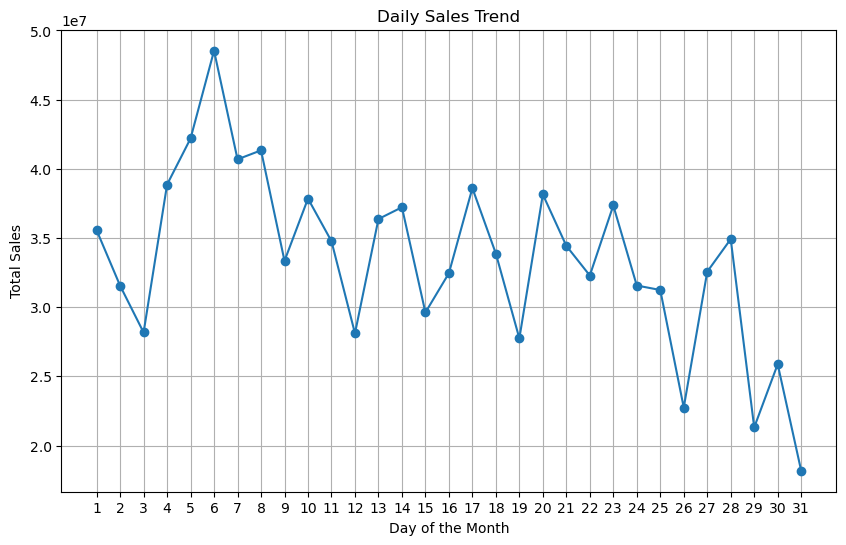

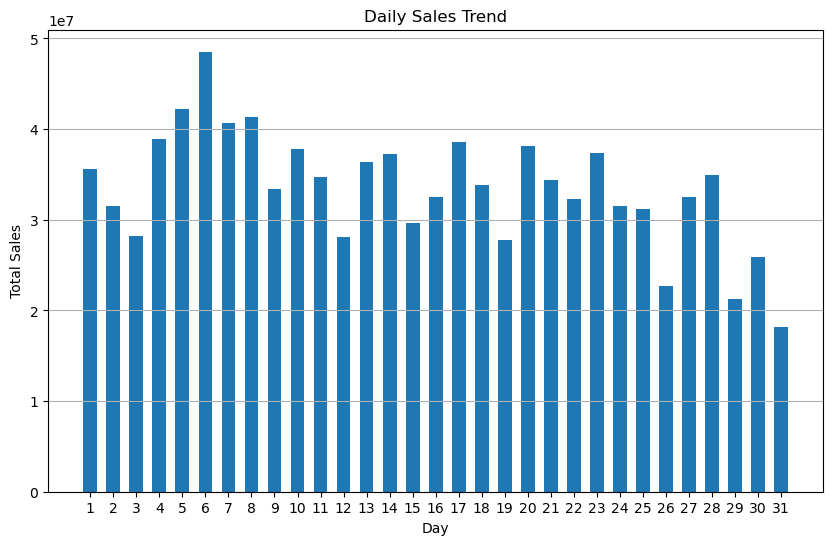

In [ ]:
# plot total number of sales against daily sales
plt.figure(figsize=(10,6))

plt.plot(daily_sales['Day'],daily_sales['total_price'], marker = 'o')

plt.title("Daily Sales Trend")
plt.xlabel("Day of the Month")
plt.ylabel("Total Sales")

# Set the x-ticks to show all days available in the data
plt.xticks(daily_sales['Day'])

# Enable grid for better readability
plt.grid(True)

# Display the plot
plt.show()



plt.figure(figsize=(10, 6))
plt.bar(daily_sales['Day'], daily_sales['total_price'], width=0.6)
plt.title("Daily Sales Trend")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.xticks(daily_sales['Day']) 
plt.grid(True, axis='y')      
plt.show()

In [19]:
## Analyse Yearly sales
yearly_sales = df.groupby('Year')['total_price'].sum().reset_index()

print(yearly_sales)


   Year   total_price
0  2010  6.792367e+07
1  2011  9.695120e+08


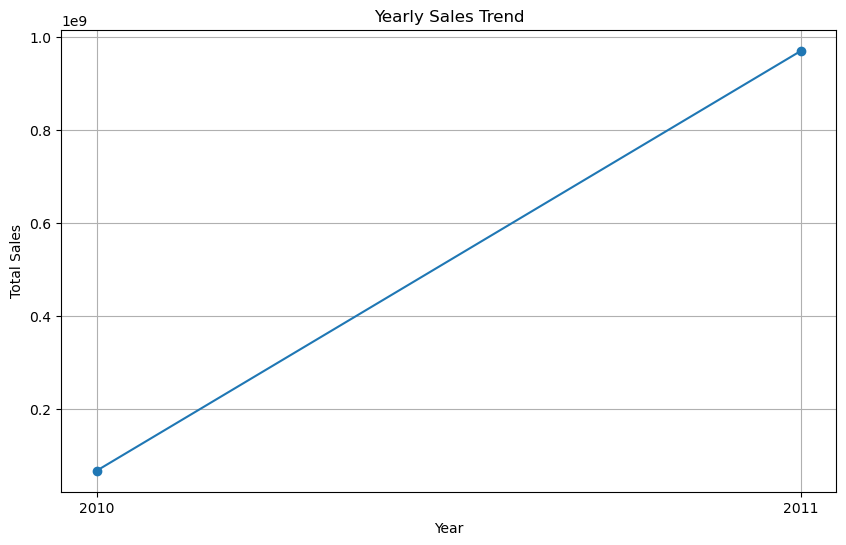

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['total_price'], marker='o', linestyle='-')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(yearly_sales['Year'])  # Ensures all years in the data are marked on the x-axis
plt.show()


In [ ]:
# Group by product description 
product_sales = (
    df.groupby('Description')
      .agg({
          'Quantity': 'sum',            # Total quantity sold
          'total_price': 'sum',         # Total revenue from that product
          'UnitPrice': 'mean'           
      })
      .reset_index().sort_values(by = 'total_price', ascending= True)
)

# Sort the products by total price
product_sales_sorted = product_sales.sort_values(by='total_price', ascending=True)

# Inspect the top 10 best-selling products by total price
pd.options.display.float_format = '{:,.2f}'.format
product_sales_sorted



,Description,Quantity,total_price,UnitPrice
0,Books,2025341,"102,515,355.87",50.48
2,Cosmetics,2051088,"103,237,174.53",50.22
6,Kitchenware,2046704,"103,412,328.85",50.40
3,Electronics,2036733,"103,493,032.88",50.64
9,Toys,2063396,"103,897,984.57",50.41
4,Furniture,2063221,"103,900,362.31",50.41
1,Cloths,2054709,"103,972,282.86",50.57
8,Sports Equipment,2060571,"104,068,224.35",50.46
5,Jewelry,2065153,"104,233,481.29",50.58
7,Shoes,2069190,"104,705,493.60",50.60


In [45]:

# # Select the top 10 products by total sales
# top_n = 10
# top_products = product_sales_sorted.head(top_n)

# # Create a bar chart
# plt.figure(figsize=(12, 6))
# plt.bar(top_products['Description'], top_products['total_price'], color='skyblue')
# plt.title("Top 10 Products by Total Sales")
# plt.xlabel("Product Description")
# plt.ylabel("Total Sales")
# plt.xticks(rotation=45, ha='right')  
# plt.tight_layout()
# plt.show()


In [49]:
#visualising customer spending
customer_activity = (
    df.groupby('CustomerID')
      .agg({
          'InvoiceNo': pd.Series.nunique,  # Number of unique invoices represents purchase frequency
          'total_price': 'sum'             # Total spending per customer
      })
      .rename(columns={'InvoiceNo': 'PurchaseFrequency', 'total_price': 'TotalSpend'})
      .reset_index()
)

print("Customer Activity Metrics:")
customer_activity

Customer Activity Metrics:


,CustomerID,PurchaseFrequency,TotalSpend
0,12346,2,"5,342.40"
1,12347,7,"431,501.00"
2,12348,4,"82,378.47"
3,12349,1,"176,075.12"
4,12350,1,"48,173.37"
...,...,...,...
4367,18280,1,"18,907.36"
4368,18281,1,"26,009.01"
4369,18282,3,"36,010.74"
4370,18283,16,"2,008,747.62"


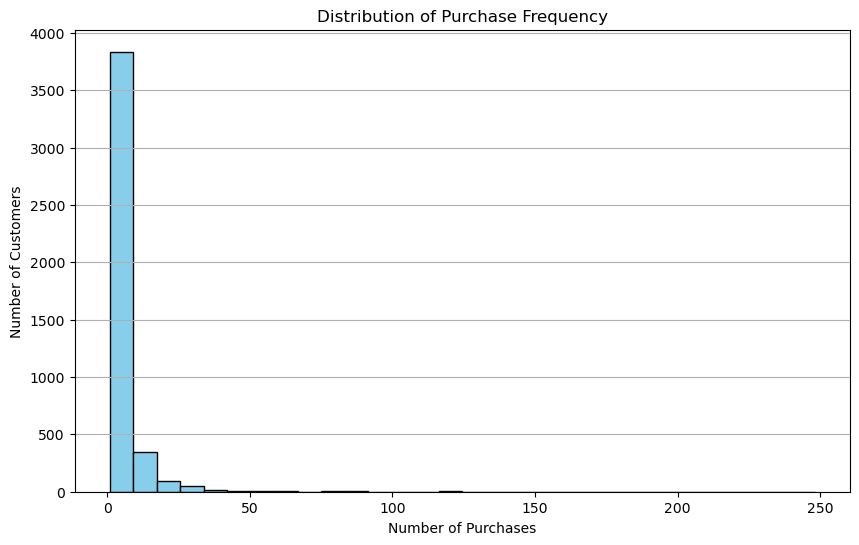

In [53]:
# Purchase behaviour

plt.figure(figsize=(10, 6))
plt.hist(customer_activity['PurchaseFrequency'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y')  # optional grid on the y-axis
plt.show()
